In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATASETS
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE CELL.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote
from urllib.error import HTTPError
from zipfile import ZipFile

CHUNK_SIZE = 40960
DATASET_MAPPING = 'state-farm-distracted-driver-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F5048%2F868335%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230223%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230223T153144Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2c184d9c53fe6533a91b50cea4f7c652ce488d0f1ccef0f59ff5485fafe196ddd71a878fbce016c4ba1d79b2f7b92dfe7f6f6399fef46240b32695b401ec60c8da1af77912cfc43894cc31d952bd11ca917d17d26fb344bc0c837dbdeae0734b580ca3f5f0e651ac5e5f57ae94af437a10217b34ae171395eb16540a2ed3d7d79422afc66764ff64b10bd498fbe5792907010bd11b084452b07af475816a7d15c0221270fbadce338f3701b94824cc25b5d37ed9fff5a5e77c7313590801ffcd47f9f7a28b8527ec7874bf244203abe2f00fd5a366643296a6c01ce3b7b1b85ceb93c5c080d16f14f9d09c899288cd1fca828f61e16007eab96821735e28821c'
KAGGLE_INPUT_PATH='/home/kaggle/input'
KAGGLE_INPUT_SYMLINK='/kaggle'

os.makedirs(KAGGLE_INPUT_PATH, 777)
os.symlink(KAGGLE_INPUT_PATH, os.path.join('..', 'input'), target_is_directory=True)
os.makedirs(KAGGLE_INPUT_SYMLINK)
os.symlink(KAGGLE_INPUT_PATH, os.path.join(KAGGLE_INPUT_SYMLINK, 'input'), target_is_directory=True)

for dataset_mapping in DATASET_MAPPING.split(','):
    directory, download_url_encoded = dataset_mapping.split(':')
    download_url = unquote(download_url_encoded)
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as zipfileres, NamedTemporaryFile() as tfile:
            total_length = zipfileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes zipped')
            dl = 0
            data = zipfileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = zipfileres.read(CHUNK_SIZE)
            print(f'\nUnzipping {directory}')
            with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue
print('Dataset import complete.')


[==================================================] 4296022692 bytes downloaded
Unzipping state-farm-distracted-driver-detection
Dataset import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import tensorflow as tf

In [3]:
data_dir = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
img_height = 180
img_width = 180
batch_size = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size )

Found 22424 files belonging to 10 classes.
Using 17940 files for training.


2023-02-23 16:00:27.479492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-23 16:00:27.479557: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22424 files belonging to 10 classes.
Using 4484 files for validation.


In [45]:
test_dir='/kaggle/input/state-farm-distracted-driver-detection/imgs/test'

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
    labels=None,
    label_mode=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 79726 files belonging to 1 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)
len(class_names)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


10

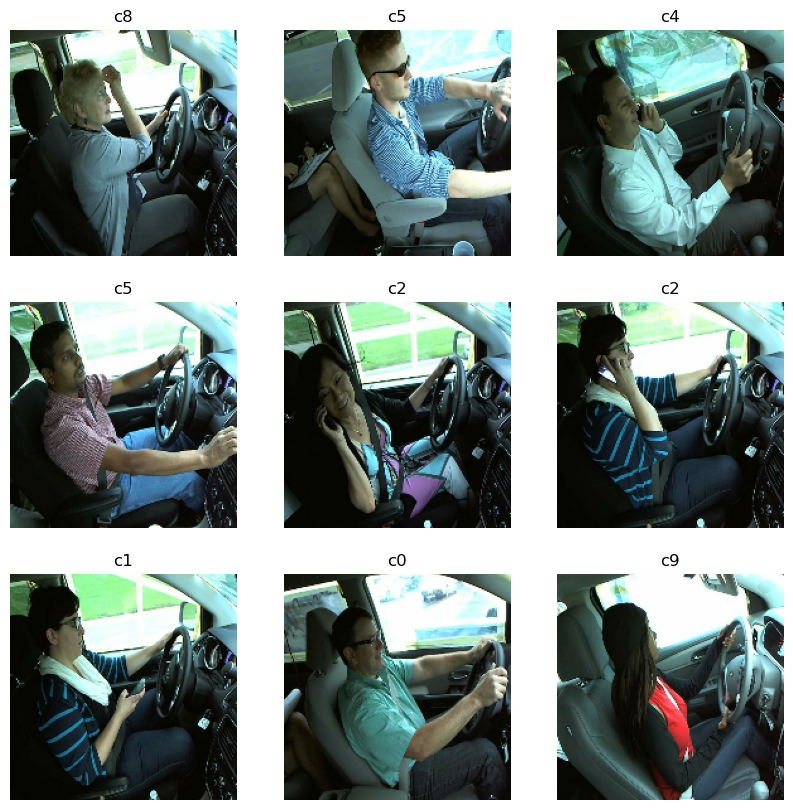

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [16]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
561/561 [==============================] - 165s 293ms/step - loss: 0.4755 - accuracy: 0.8431 - val_loss: 0.0926 - val_accuracy: 0.9748
Epoch 2/3
561/561 [==============================] - 166s 296ms/step - loss: 0.0448 - accuracy: 0.9879 - val_loss: 0.0549 - val_accuracy: 0.9839
Epoch 3/3
561/561 [==============================] - 167s 298ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0529 - val_accuracy: 0.9848


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_ds)

2492/2492 [==============================] - 129s 52ms/step


In [19]:
predictions[0]

array([9.9945307e-01, 3.2127326e-04, 5.4432520e-10, 7.2930418e-02,
       9.9999851e-01, 9.9999756e-01, 6.2047556e-04, 5.5977666e-01,
       7.3067105e-01, 9.9955833e-01], dtype=float32)

In [41]:
test_ds

<PrefetchDataset element_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None)>

In [42]:
test_ds = list(test_ds.as_numpy_iterator())

In [86]:
fileSize = len(test_ds.file_paths)
finalPredictions = tf.keras.utils.to_categorical(np.argmax(predictions,axis=-1))


In [87]:
final_pred = [['img', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']]
for i in range(fileSize):
    index = test_ds.file_paths[i].rfind('/')
    label = [test_ds.file_paths[i][index+1:]]
    final_pred.append(label+list(finalPredictions[i]))

In [88]:
my_array = np.array(final_pred)

df = pd.DataFrame(my_array[1:], columns = [my_array[0]])

In [89]:
df.to_csv('result.csv', index=False)